# Ejemplos y experimentos de la criptografía cuántica

## Explicación de envió de mensaje con Física Cuántica



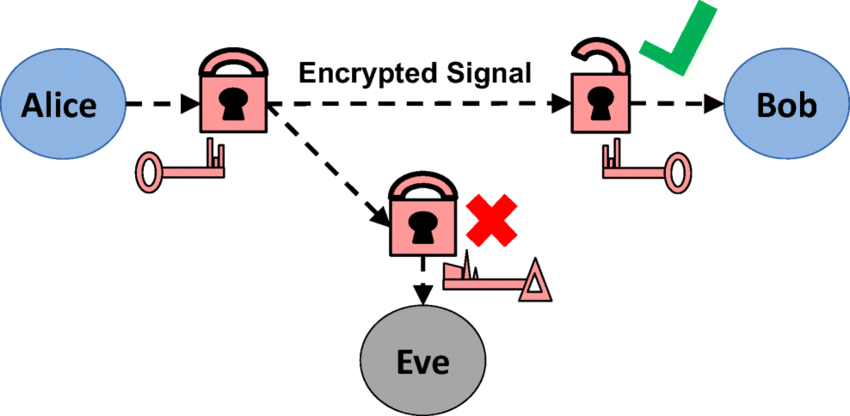

En la era digital, la protección de la información confidencial es de suma importancia. El protocolo BB84, desarrollado por Charles Bennett y Gilles Brassard en 1984, se presenta como una solución innovadora para garantizar la seguridad de las comunicaciones. Este protocolo, basado en los principios de la mecánica cuántica, permite a dos partes, Alice y Bob, establecer una clave secreta compartida de manera inquebrantable, incluso en presencia de un espía como Eva.

## Funcionamiento del protocolo:

*Codificación del mensaje:* Alice transforma el mensaje original en una secuencia de bits clásicos.

*Preparación de qubits:* Alice codifica cada bit clásico en un qubit, utilizando bases cuánticas predefinidas (por ejemplo, X y Z). Los qubits son unidades de información cuántica que pueden existir en superposición de estados, a diferencia de los bits clásicos que solo pueden ser 0 o 1.

*Envío de qubits:* Alice envía los qubits a Bob a través de un canal de comunicación cuántico, como una fibra óptica.

*Medición de qubits:* Bob recibe los qubits y mide cada uno en una base aleatoria (X o Z). Si la base elegida por Bob coincide con la base utilizada por Alice para codificar el qubit, la medición revela el estado original del qubit. Si las bases no coinciden, la medición introduce aleatoriedad y podría revelar información incorrecta.

*Comparación de bases:* Alice y Bob comparan públicamente las bases que utilizaron para medir cada qubit.

*Detección de eavesdropping:* Si las bases coinciden en todos los qubits, se confirma que la comunicación ha sido segura y libre de interferencias de Eva. Sin embargo, si las bases difieren en algunos qubits, se detecta la presencia de Eva y la clave secreta se descarta.

*Reconciliación de claves y generación de clave secreta:* Alice y Bob comparten una fracción aleatoria de los qubits medidos para verificar la integridad del canal. Luego, utilizan técnicas de corrección de errores cuánticos para corregir cualquier error introducido por el ruido o la interferencia. Finalmente, destilan una clave secreta compartida a partir de los qubits restantes.

### Ventajas del protocolo BB84:

1. Seguridad inviolable: La seguridad del protocolo se basa en las leyes de la física cuántica, lo que lo hace inmune a los ataques computacionales clásicos y futuros ataques cuánticos.

2. Autenticación de las partes: El protocolo permite a Alice y Bob verificar la identidad del otro antes de establecer la clave secreta.

3. Privacidad de la comunicación: El contenido del mensaje original permanece confidencial durante todo el proceso.

#### Aplicaciones del protocolo BB84:

A. Comunicaciones seguras: El protocolo BB84 se puede utilizar para proteger comunicaciones confidenciales en áreas como la banca, el gobierno y la defensa.

B. Distribución de claves criptográficas: El protocolo puede usarse para distribuir claves criptográficas de forma segura para su uso en sistemas de cifrado.

C. Autenticación de dispositivos: El protocolo puede usarse para autenticar dispositivos en redes cuánticas.

## Conclusión:

El protocolo BB84 representa un avance significativo en la criptografía cuántica, ofreciendo una solución robusta y segura para proteger la información confidencial en la era digital. A medida que la tecnología cuántica continúa desarrollándose, el protocolo BB84 y otras técnicas de criptografía cuántica desempeñarán un papel cada vez más importante en la protección de nuestras comunicaciones y datos.

# La implementación de la criptografía Cuántica (Alice y Bob)

In [17]:
import numpy as np

class QuantumCryptoCommunication:
    """
    Demostración de comunicación en criptografía cuántica entre Alice y Bob.
    """

    def __init__(self):
        self.states = {
            '0': np.array([[1], [0]]),
            '1': np.array([[0], [1]])
        }

    def alice_send(self):
        """
        Simula el envío de fotones por parte de Alice.

        Returns:
        - list: Estados de polarización enviados por Alice.
        """
        message = input("Mensaje a enviar (0's y 1's): ")
        alice_states = [self.states[key] for key in message]
        return alice_states

    def bob_measure(self, alice_states):
        """
        Simula la medición de los fotones por parte de Bob.

        Args:
        - alice_states (list): Estados de polarización enviados por Alice.

        Returns:
        - list: Estados de polarización medidos por Bob.
        """
        measured_states = [self.states['0'] if np.random.rand() < 0.5 else self.states['1'] for _ in range(len(alice_states))]
        return measured_states

    def compare_measurements(self, alice_states, bob_states):
        """
        Compara las medidas de polarización de Alice y Bob.

        Args:
        - alice_states (list): Estados de polarización enviados por Alice.
        - bob_states (list): Estados de polarización medidos por Bob.

        Returns:
        - list: Índices de las medidas coincidentes.
        """
        return [i for i in range(len(alice_states)) if np.array_equal(alice_states[i], bob_states[i])]

    def main(self):
        """
        Función principal que demuestra la comunicación entre Alice y Bob.
        """
        # Alice envía los fotones a Bob
        alice_states = self.alice_send()

        # Bob mide los fotones
        bob_states = self.bob_measure(alice_states)

        # Bob y Alice comparan sus medidas
        matching_indices = self.compare_measurements(alice_states, bob_states)

        # Mostrar resultados
        print("Índices de medidas coincidentes:", matching_indices)

if __name__ == "__main__":
    quantum_crypto = QuantumCryptoCommunication()
    quantum_crypto.main()


Mensaje a enviar (0's y 1's):  000011100


Índices de medidas coincidentes: [0, 2, 3, 4, 5, 8]


# La implementación del protocolo BB84 en Python 

In [7]:
import numpy as np

class BB84Protocol:
    """
    Implementación del protocolo BB84 para criptografía cuántica.
    """

    def __init__(self):
        self.bases = {
            'X': np.array([[1, 0], [0, 1]]),
            'Y': np.array([[0, -1j], [1j, 0]]),
            'Z': np.array([[1, 0], [0, -1]])
        }
        
        self.states = {
            '0': np.array([[1], [0]]),
            '1': np.array([[0], [1]])
        }

    def generate_key(self, n):
        """
        Genera una clave aleatoria de longitud n.

        Args:
        - n (int): Longitud de la clave.

        Returns:
        - str: Clave aleatoria generada.
        """
        return ''.join(np.random.choice(['0', '1'], n))

    def alice_send(self):
        """
        Simula el envío de fotones por parte de Alice.

        Returns:
        - tuple: Bases de polarización de Alice y los estados de polarización enviados.
        """
        n = int(input("Ingrese la longitud de la clave: "))
        alice_bases = np.random.choice(['X', 'Y', 'Z'], n)
        alice_states = [self.states[key] for key in self.generate_key(n)]
        return alice_bases, alice_states

    def bob_measure(self, alice_bases, alice_states):
        """
        Simula la medición de los fotones por parte de Bob.

        Args:
        - alice_bases (numpy.ndarray): Bases de polarización de Alice.
        - alice_states (list): Estados de polarización enviados por Alice.

        Returns:
        - tuple: Bases de polarización de Bob y los estados de polarización medidos.
        """
        bob_bases = np.random.choice(['X', 'Y', 'Z'], len(alice_bases))
        measured_states = [np.dot(self.bases[bob_bases[i]].conj().T, alice_states[i]) for i in range(len(alice_bases))]
        return bob_bases, measured_states

    def compare_bases(self, alice_bases, bob_bases):
        """
        Compara las bases de polarización de Alice y Bob.

        Args:
        - alice_bases (numpy.ndarray): Bases de polarización de Alice.
        - bob_bases (numpy.ndarray): Bases de polarización de Bob.

        Returns:
        - list: Índices de las bases coincidentes.
        """
        return [i for i in range(len(alice_bases)) if alice_bases[i] == bob_bases[i]]

    def communicate_bases(self, alice_bases, bob_bases, indices):
        """
        Comunica las bases coincidentes entre Alice y Bob.

        Args:
        - alice_bases (numpy.ndarray): Bases de polarización de Alice.
        - bob_bases (numpy.ndarray): Bases de polarización de Bob.
        - indices (list): Índices de las bases coincidentes.

        Returns:
        - tuple: Bases coincidentes de Alice y Bob.
        """
        return [alice_bases[i] for i in indices], [bob_bases[i] for i in indices]

    def compare_measurements(self, alice_states, bob_states, indices):
        """
        Compara las medidas de polarización de Alice y Bob.

        Args:
        - alice_states (list): Estados de polarización enviados por Alice.
        - bob_states (list): Estados de polarización medidos por Bob.
        - indices (list): Índices de las medidas coincidentes.

        Returns:
        - list: Índices de las medidas coincidentes.
        """
        return [i for i in range(len(alice_states)) if np.array_equal(alice_states[i], bob_states[i])]

    def run_protocol(self):
        """
        Ejecuta el protocolo BB84 completo e imprime la clave generada.
        """
        # Alice envía los fotones a Bob
        alice_bases, alice_states = self.alice_send()
    
        # Bob mide los fotones
        bob_bases, measured_states = self.bob_measure(alice_bases, alice_states)
    
        # Alice y Bob comparan sus bases
        matching_indices = self.compare_bases(alice_bases, bob_bases)
    
        if not matching_indices:
            print("No se encontraron bases coincidentes. El protocolo ha fallado.")
            return
    
        # Comunican sus bases
        alice_bases_matched, bob_bases_matched = self.communicate_bases(alice_bases, bob_bases, matching_indices)
    
        # Bob y Alice comparan sus medidas
        matching_indices_measurements = self.compare_measurements(alice_states, measured_states, matching_indices)
    
        if not matching_indices_measurements:
            print("No se encontraron medidas coincidentes. El protocolo ha fallado.")
            return
    
        # Clave generada
        key = ''.join([alice_bases_matched[i] for i in matching_indices_measurements if i < len(alice_bases_matched)])
    
        print("Clave generada:", key)



if __name__ == "__main__":
    bb84 = BB84Protocol()
    bb84.run_protocol()


Ingrese la longitud de la clave:  5


Clave generada: ZX


# Teletransportación Cuántica
La teletransportación cuántica es un fenómeno fascinante en la teoría cuántica que permite transferir el estado de un qubit de un lugar a otro, sin que el qubit mismo viaje físicamente de un lugar a otro. Aquí tienes una explicación de cómo funciona:

1. Estado inicial: El proceso comienza con dos partes que deseamos teletransportar, Alice y Bob, y una tercera parte, llamada "Eve" o "Charlie", que ayuda en la comunicación pero no tiene conocimiento del estado cuántico a ser teletransportado.

2. Entrelazamiento cuántico: Antes de comenzar el proceso de teletransportación, Alice y Bob generan un par de qubits entrelazados mediante un proceso como el de la creación de pares de partículas enredadas. Cada qubit de este par se envía a Alice y a Bob respectivamente.

3. Preparación del estado: Alice tiene el qubit que quiere teletransportar. Ella combina su qubit con el suyo del par entrelazado mediante una operación especial llamada "teleportación". Esto resulta en una correlación cuántica entre el estado que Alice quiere teletransportar y el estado del qubit que Bob tiene.

4. Medición y comunicación clásica: Alice realiza una medición en su qubit y en el qubit entrelazado que tiene. Estas mediciones resultan en dos bits clásicos que Alice envía a Bob a través de un canal de comunicación clásico. Estos bits contienen información sobre la medición que Alice realizó en su qubit.

5. Corrección de estado: Basándose en los bits que Alice envió, Bob realiza una o dos operaciones en su qubit entrelazado para corregir cualquier cambio en el estado causado por la medición realizada por Alice.

6. Resultado: Después de realizar estas operaciones, el qubit de Bob adquiere el estado original del qubit de Alice. Aunque este proceso parece que se ha transmitido información más rápido que la velocidad de la luz, no se viola la causalidad ni se transmite información más rápido que la velocidad de la luz, ya que aún se necesita la comunicación clásica entre Alice y Bob.
# La implementación del experimento de teletransportación 

In [3]:
import numpy as np

# Definir compuertas cuánticas
Hadamard = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
PauliX = np.array([[0, 1], [1, 0]])
PauliZ = np.array([[1, 0], [0, -1]])

# Estado aleatorio a teletransportar
psi = np.random.choice([0, 1], size=2)

# Crear un par de qubits entrelazados
q0 = np.array([1, 0])  # Inicializar qubit 0 en |0>
q1 = np.array([0, 1])  # Inicializar qubit 1 en |1>

# Codificar el estado a teletransportar en q0 y q1
q0 = np.dot(Hadamard, q0)
q1 = np.dot(Hadamard, q1)
q0 = np.dot(PauliX if psi[0] else np.eye(2), q0)
q1 = np.dot(PauliZ if psi[1] else np.eye(2), q1)

# Decodificar el estado teletransportado
q0 = np.dot(PauliX, q0)
q1 = np.dot(PauliZ, q1)
q0 = np.dot(Hadamard, q0)

# Medir los qubits para obtener el estado teletransportado
result = [int(np.round(np.abs(q0[0])**2)), int(np.round(np.abs(q1[0])**2))]

# Imprimir el estado teletransportado
print("Estado teletransportado:", result)


Estado teletransportado: [1, 0]
